# Productivity Prediction

## Goal: To predict the employees' productivity.

Data Source: https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees#

### 1. Import necessary packages

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import sklearn.datasets as skdatasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 2. Data Preparation

In [2]:
# Load datasets
file_path = r"C:\Users\user\Desktop\AI07\Projects\P2\garments_worker_productivity.csv"
data = pd.read_csv(file_path, sep=",")
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [3]:
# Inspect for missing values
print(data.isna().sum())

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


In [4]:
# Drop unnecessary columns
data = data.drop(['date', 'day'], axis=1)
data.shape

(1197, 13)

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   team                   1197 non-null   int64  
 3   targeted_productivity  1197 non-null   float64
 4   smv                    1197 non-null   float64
 5   wip                    691 non-null    float64
 6   over_time              1197 non-null   int64  
 7   incentive              1197 non-null   int64  
 8   idle_time              1197 non-null   float64
 9   idle_men               1197 non-null   int64  
 10  no_of_style_change     1197 non-null   int64  
 11  no_of_workers          1197 non-null   float64
 12  actual_productivity    1197 non-null   float64
dtypes: float64(6), int64(5), object(2)
memory usage: 121.7+ KB
None


In [6]:
# Label encoding for categorical variables
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
data['quarter'] = label_encoder.fit_transform(data['quarter'])
data['department'] = label_encoder.fit_transform(data['department'])
print(data.head())

   quarter  department  team  targeted_productivity    smv     wip  over_time  \
0        0           2     8                   0.80  26.16  1108.0       7080   
1        0           1     1                   0.75   3.94     NaN        960   
2        0           2    11                   0.80  11.41   968.0       3660   
3        0           2    12                   0.80  11.41   968.0       3660   
4        0           2     6                   0.80  25.90  1170.0       1920   

   incentive  idle_time  idle_men  no_of_style_change  no_of_workers  \
0         98        0.0         0                   0           59.0   
1          0        0.0         0                   0            8.0   
2         50        0.0         0                   0           30.5   
3         50        0.0         0                   0           30.5   
4         50        0.0         0                   0           56.0   

   actual_productivity  
0             0.940725  
1             0.886500  
2    

In [7]:
data.describe()

,quarter,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,1.399332,1.369256,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,1.215535,0.805909,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,0.000000,0.000000,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,0.000000,1.000000,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,1.000000,2.000000,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,2.000000,2.000000,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,4.000000,2.000000,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [8]:
# Handle missing values
data = data.fillna(0)
print(data.head())

   quarter  department  team  targeted_productivity    smv     wip  over_time  \
0        0           2     8                   0.80  26.16  1108.0       7080   
1        0           1     1                   0.75   3.94     0.0        960   
2        0           2    11                   0.80  11.41   968.0       3660   
3        0           2    12                   0.80  11.41   968.0       3660   
4        0           2     6                   0.80  25.90  1170.0       1920   

   incentive  idle_time  idle_men  no_of_style_change  no_of_workers  \
0         98        0.0         0                   0           59.0   
1          0        0.0         0                   0            8.0   
2         50        0.0         0                   0           30.5   
3         50        0.0         0                   0           30.5   
4         50        0.0         0                   0           56.0   

   actual_productivity  
0             0.940725  
1             0.886500  
2    

In [9]:
#Split the data into features and labels
features = data.drop('actual_productivity', axis=1)
labels = data.actual_productivity

### 3. Perform a train test split to obtain training and testing dataset

In [10]:
SEED = 12345
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=SEED)

### 4. Data Normalization

In [11]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
standardizer.fit(X_train)
X_train = standardizer.transform(X_train)
X_test = standardizer.transform(X_test)

### 5. Define the Neural Network model using Functional API

In [12]:
#Start with input layer
nIn = X_train.shape[1]
inputs = keras.Input(shape=(nIn,))
h1 = layers.Dense(128, activation='elu')
h2 = layers.Dense(64, activation='elu')
h3 = layers.Dense(32, activation='elu')
out_layer = layers.Dense(1)

#Use Functional API to link layers together
x = h1(inputs)
x = h2(x)
x = h3(x)
outputs = out_layer(x)

#Create a model by using the model object
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense (Dense)               (None, 128)               1664      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,033
Trainable params: 12,033
Non-trainable params: 0
_________________________________________________________________


### 6. Compile model

In [13]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

### 7. Perform model training

In [14]:
BATCH_SIZE = 32
EPOCHS = 30

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/30
30/30 [==============================] - 1s 8ms/step - loss: 0.2158 - mae: 0.3346 - val_loss: 0.0552 - val_mae: 0.1610
Epoch 2/30
30/30 [==============================] - 0s 3ms/step - loss: 0.0370 - mae: 0.1390 - val_loss: 0.0337 - val_mae: 0.1270
Epoch 3/30
30/30 [==============================] - 0s 3ms/step - loss: 0.0258 - mae: 0.1202 - val_loss: 0.0297 - val_mae: 0.1267
Epoch 4/30
30/30 [==============================] - 0s 3ms/step - loss: 0.0233 - mae: 0.1153 - val_loss: 0.0293 - val_mae: 0.1146
Epoch 5/30
30/30 [==============================] - 0s 3ms/step - loss: 0.0218 - mae: 0.1077 - val_loss: 0.0256 - val_mae: 0.1114
Epoch 6/30
30/30 [==============================] - 0s 3ms/step - loss: 0.0211 - mae: 0.1074 - val_loss: 0.0268 - val_mae: 0.1163
Epoch 7/30
30/30 [==============================] - 0s 3ms/step - loss: 0.0235 - mae: 0.1116 - val_loss: 0.0263 - val_mae: 0.1206
Epoch 8/30
30/30 [==============================] - 0s 3ms/step - loss: 0.0253 - mae: 0.11

### 8. Visualize the result of model training

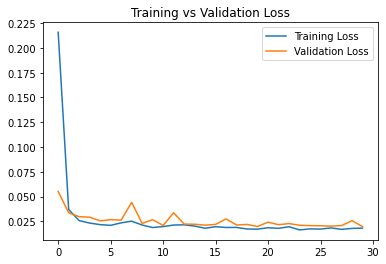

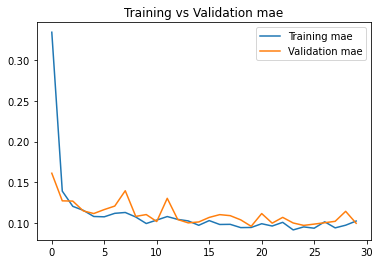

<Figure size 432x288 with 0 Axes>

In [15]:
training_loss = history.history['loss']
val_loss = history.history['val_loss']
training_acc = history.history['mae']
val_acc = history.history['val_mae']
epochs_x_axis = history.epoch

plt.plot(epochs_x_axis , training_loss, label='Training Loss')
plt.plot(epochs_x_axis, val_loss, label='Validation Loss')
plt.title("Training vs Validation Loss") # easier to detect over/under fitting using validation plot
plt.legend()
plt.figure()

plt.plot(epochs_x_axis, training_acc, label='Training mae')
plt.plot(epochs_x_axis, val_acc, label='Validation mae')
plt.title('Training vs Validation mae')
plt.legend()
plt.figure()

plt.show()

### 9. Make Prediction with your model

In [16]:
predictions = model.predict(X_test)
pred_vs_label = np.concatenate((predictions, np.expand_dims(y_test, axis=1)), axis=1)

In [17]:
pred_vs_label = pd.DataFrame(data=pred_vs_label, columns=['prediction', 'labels'])
pred_vs_label

,prediction,labels
0,0.632879,0.734646
1,0.723493,0.664875
2,0.955047,0.850569
3,0.835002,0.800031
4,0.844835,0.800077
...,...,...
235,0.706579,0.700614
236,0.724966,0.870581
237,0.572762,0.283958
238,0.833305,0.861875


#### Evaluate the regression model

In [18]:
from sklearn.metrics import mean_absolute_error
score = round(mean_absolute_error(y_test, predictions), 4)
print("Mean Absolute Error for the actual and predicted values is ", score)

Mean Absolute Error for the actual and predicted values is  0.0994


### 10. Visualizing the prediction vs label graph

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='actual_productivity'>

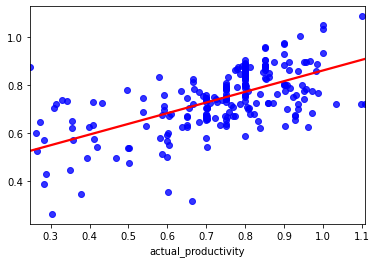

In [19]:
import seaborn as sns

#create scatterplot with regression line
sns.regplot(y_test, predictions, ci=None, scatter_kws={"color": "blue"}, line_kws={"color": "red"})